# <center>Comunicaciondes Digitales <center>Apunter de clase <center> Juan Carlos Aguirre Arango cod: 0816001
## Modulación 
Usamos la modulación como una herramienta que nos permite sobrepasar las complicaciónes que tiene un medio físico para el transporte de la información que queremos enviar. 

### **Contenido**
#### 1.Modulación en Banda Base 
* PAM Señales Moduladas por Amplitud de Pulsos 
* Espectro(Relación Tiempo-Frecuencia)
* Modulacion por Multinevel 
* Comparación de efeciencia 

### 2.Modulación de Orden Superior 
* Concepto de ortogonalidad 
* Modulación en Banda Pasante 
* Modulación en fase 
* Modulación en cuadratura 

### 3.Evaluación 

##  1. Modulación en Banda Base 
Cuando hablamos de banda base nos referimos que el rango de frecuencias resultante de la modulación se encuentra centrada en el origen 

#### PAM Señales Moduladas por Amplitud de Pulsos 
Por lo general la forma de la señal modulada es de la siguiente:

$$f_{m}(t) = A(M)f_{c}(t)$$

Donde $A(\cdot )$ es una la amplitud y que depende del mensaje $M$, y $f_{c}$ es la señal portadora 

#### ejemplo

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
fs = 1/10000# frecuencia de muestreo del timepo "real"

In [2]:
tB = 0.5#tiempo de bit, duración de cada bits 
tb = np.arange(0,tB,fs)

M = np.asarray([1,0,1,0,1,1,0,1,0,1]) # Mensajes 
fc = np.sin(2*np.pi*tb*1/(2*tB))  # carrier o portadora, escogida de forma cuaquiera 

tf = tB*len(M)
t = np.arange(0,tf,fs)

fm = np.array([])

for i in M:
    fm = np.append(fm, i*fc) 

(0, 1.0)

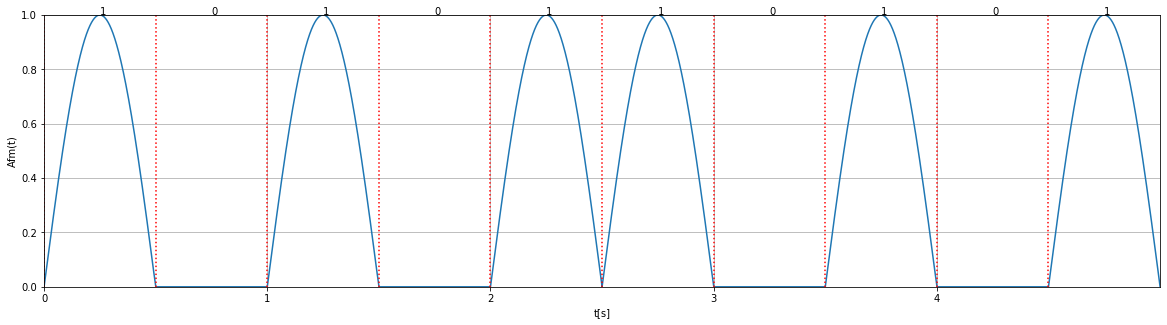

In [3]:
plt.figure(figsize=(20,5))
plt.plot(t,fm)
for i in range(len(M)):
    plt.axvline(i*tB, color='r', ls="dotted")
    plt.text((i*tB)+tB/2,1,M[i])
plt.grid()
plt.xlabel('t[s]')
plt.ylabel('Afm(t)')
plt.xlim(([0,max(t)]))
plt.ylim(([0,max(fm)]))

### Convolución para pulse shaping

se presentan problemas cunado el pulse shaping tiene una duración más grande que la duración de bit 

In [4]:
def pulse_train(M,tB):
    t = np.arange(0,tB,fs)*0 
    fc = np.zeros(len(t))
    fc[int(len(t)/2)] = 1 
    
    tf = tB*len(M)
    t = np.arange(0,tf,fs)

    fm = np.array([])

    for i in M:
        fm = np.append(fm, i*fc) 
    return fm,t

In [5]:
M = np.asarray([1,0,1,0,1,1,0,1,1,1,0,1])
x,t = pulse_train(M,tB)

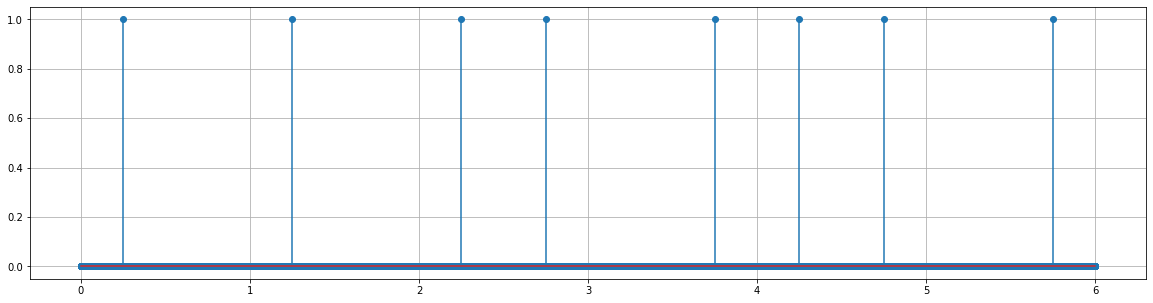

In [6]:
plt.figure(figsize=(20,5))
plt.stem(t,x, use_line_collection = True)
plt.grid()

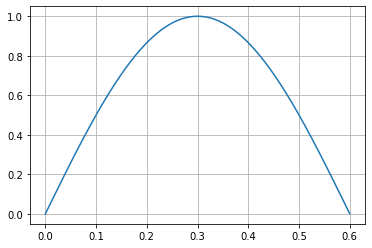

In [7]:
tb = np.arange(0,0.6,fs)
fc = np.sin(2*np.pi*tb*0.833)
plt.plot(tb,fc)
plt.grid()

In [8]:
cn = np.convolve(x,fc,mode="same")

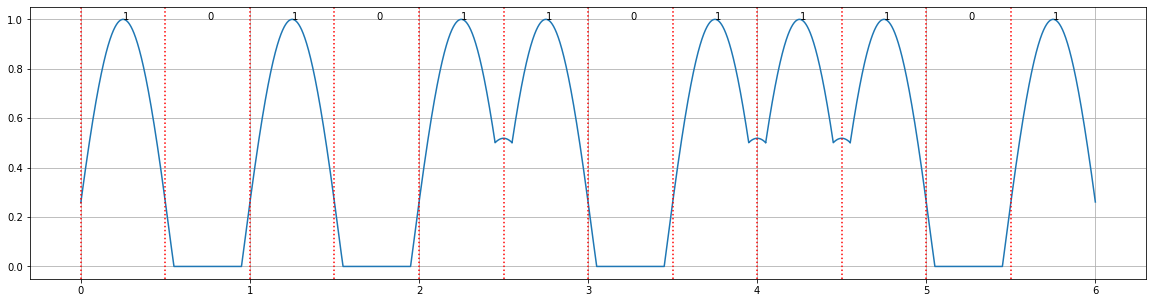

In [9]:
plt.figure(figsize=(20,5))
plt.plot(t,cn)
for i in range(len(M)):
    plt.axvline(i*tB, color='r', ls="dotted")
    plt.text((i*tB)+tB/2,1,M[i])
plt.grid()

#### Filtro de coseno realzado 

In [10]:
def cosR(betha,T,t):
    a = np.cos(np.pi*betha*t/T)/(1-(4*betha**2*t**2)/T**2)
    h = np.sinc(t/T)*a
    return h 

In [11]:
t_ = np.arange(-5,5,fs)
h = cosR(0.25,1,t_)

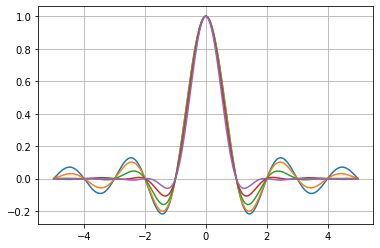

In [12]:
roll_off = np.arange(0,1,0.2)
for i in range(len(roll_off)):
    h = cosR(roll_off[i],1,t_)
    plt.plot(t_,h)
    plt.grid()

In [13]:
def plot_hz(X,Fi,Ff,f):
    i,j = int(Fi*10), int(Ff*10)
    plt.plot(f[i:j],X[i:j])

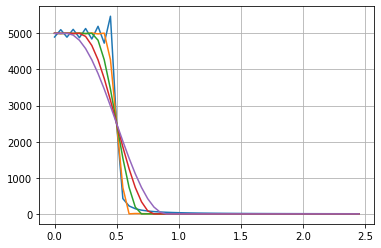

In [14]:
for i in range(len(roll_off)):
    h = cosR(roll_off[i],0.5,t_)
    H = np.fft.fft(h)
    
    f = np.fft.fftfreq((2*len(H))-1,fs)
    plot_hz(abs(H),0,5,f)
    plt.grid()

#### Pulse shaping 

In [15]:
tB

0.5

In [16]:
t_ = np.arange(-1.5,1.5,fs)
fc = cosR(0.1,0.1,t_)

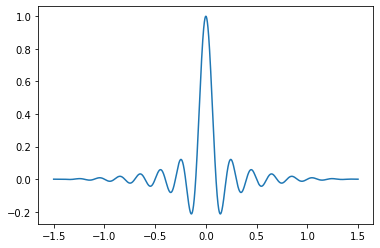

In [17]:
plt.plot(t_,fc)

In [18]:
cn = np.convolve(x,fc,mode="same")

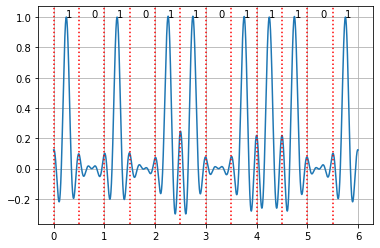

In [19]:
plt.plot(t,cn)
for i in range(len(M)):
    plt.axvline(i*tB, color='r', ls="dotted")
    plt.text((i*tB)+tB/2,1,M[i])
plt.grid()

## Diagrama de ojo

Corresponde a un gráfico que muestra la superposición de las distintas combinaciones posibles de unos y ceros en un rango de tiempo o cantidad de bits determinados 

In [20]:
def combin(bits): 
    x = np.zeros((2**bits, bits))
    for i in range(x.shape[0]):
        b_ = bin(i)[2:]
        for j in range(len(b_)):
            x[i,x.shape[1]-1-len(b_)-j] = int(b_[j])
    return x 

In [21]:
M = combin(3)
M.shape
tb = np.arange(0,1,fs)
fc = np.sin(2*np.pi*tb*1/(2*tB)) 
tb = np.arange(0,1,fs)
fc =(tb <= 0.75)*(tb>=0.2501)

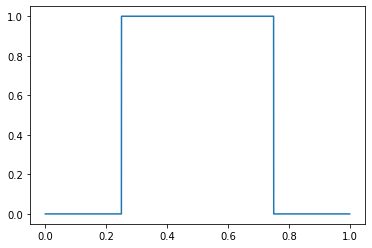

In [22]:
plt.plot(tb,fc)

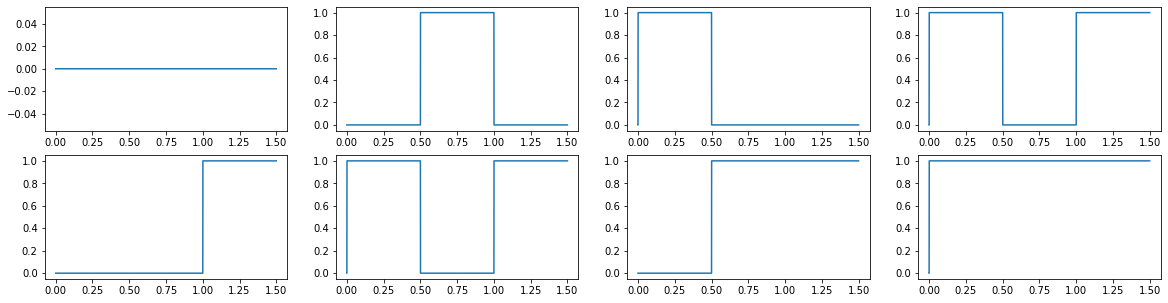

In [23]:
plt.figure(figsize=(20,5))
for i in range(M.shape[0]):
    x,t = pulse_train(M[i,:],tB)
    cn = np.convolve(x,fc,mode="same")
    plt.subplot(2,4,i+1)
    plt.plot(t,cn)

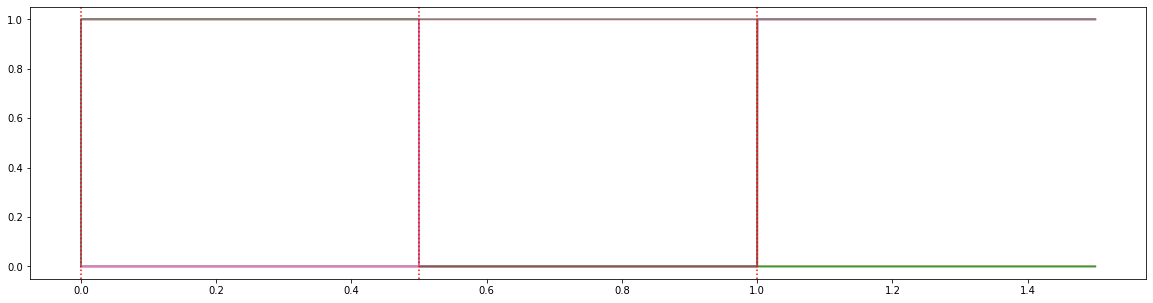

In [24]:
plt.figure(figsize=(20,5))
for i in range(M.shape[0]):
    x,t = pulse_train(M[i,:],tB)
    cn = np.convolve(x,fc,mode="same")
    plt.plot(t,cn)
    
for i in range(len(M[0,:])):
    plt.axvline(i*tB, color='r', ls="dotted")

el diagrama de ojo nos dice donde muestrear 

In [25]:
M = combin(3)
M.shape
tb = np.arange(0,1,fs)
fc = np.sin(2*np.pi*tb*0.5) 

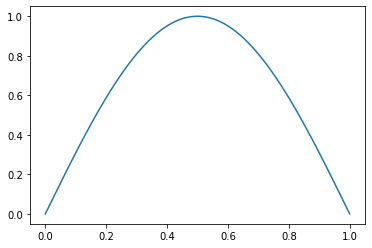

In [26]:
plt.plot(tb,fc)

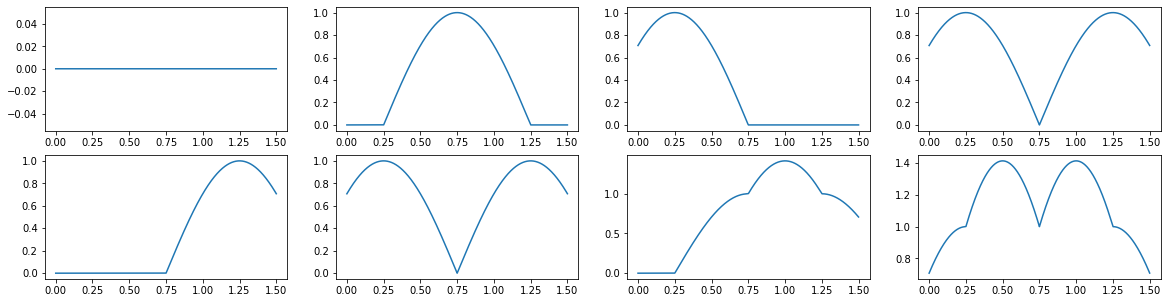

In [27]:
plt.figure(figsize=(20,5))
for i in range(M.shape[0]):
    x,t = pulse_train(M[i,:],tB)
    cn = np.convolve(x,fc,mode="same")
    plt.subplot(2,4,i+1)
    plt.plot(t,cn)
    

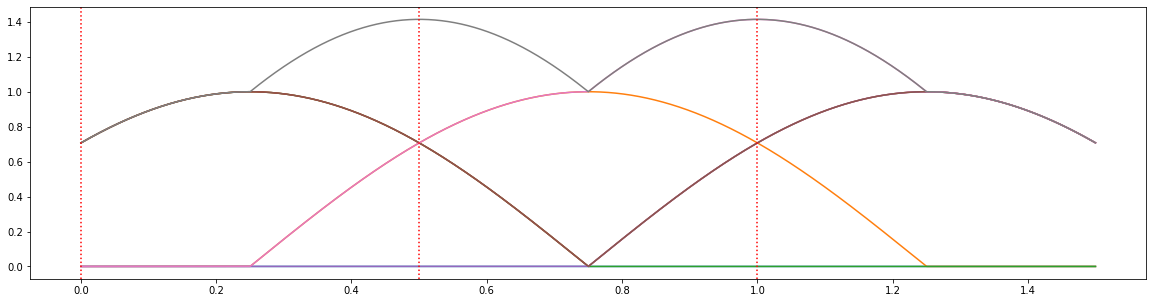

In [28]:
plt.figure(figsize=(20,5))
for i in range(M.shape[0]):
    x,t = pulse_train(M[i,:],tB)
    cn = np.convolve(x,fc,mode="same")
    plt.plot(t,cn)
    
for i in range(len(M[0,:])):
    plt.axvline(i*tB, color='r', ls="dotted")

### MUESTREO 

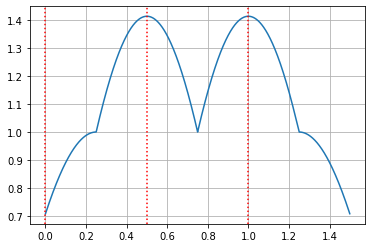

In [29]:
plt.plot(t,cn)
for j in range(len(M[0,:])):
    plt.axvline(j*tB, color='r', ls="dotted")
plt.grid()

In [30]:
t_sams = [0.25,0.4]

In [31]:
def muestreo(x,t_sam):
    y  = np.zeros(x.shape)
    i = tB/fs  
    n = int(len(x)/i)    
    for j in range(n):
        y[int(j*i)+ int(t_sam/fs)] = x[int(j*i)+int(t_sam/fs)]
    return y 

<Figure size 432x288 with 0 Axes>

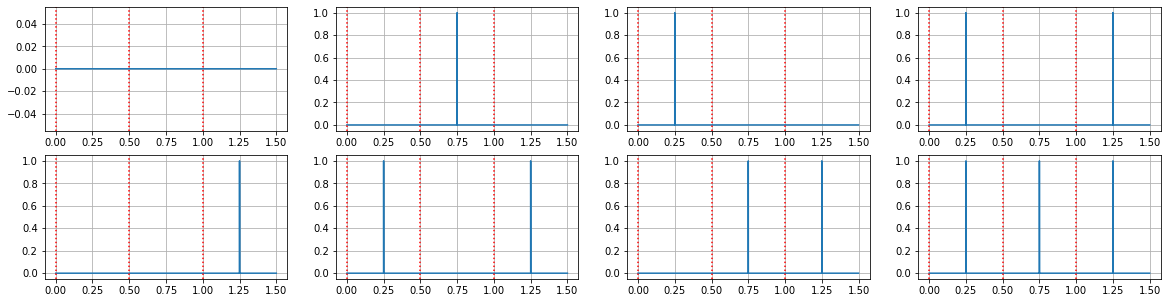

<Figure size 432x288 with 0 Axes>

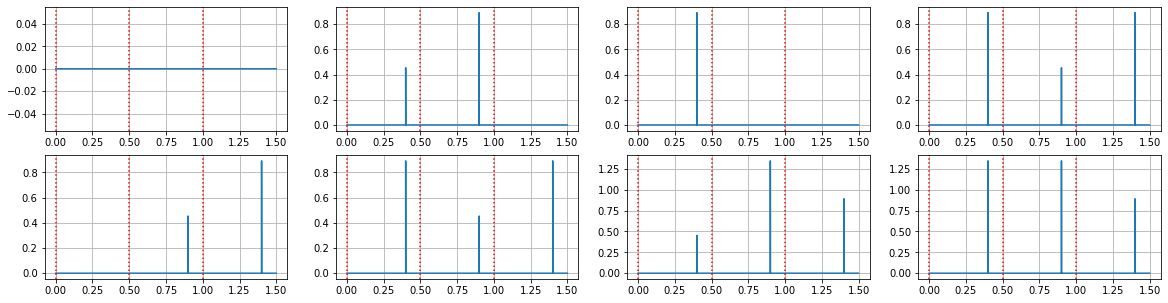

In [32]:

for k in t_sams:
    plt.figure()
    plt.figure(figsize=(20,5))
    for i in range(M.shape[0]):
        x,t = pulse_train(M[i,:],tB)
        cn = np.convolve(x,fc,mode="same")
        y = muestreo(cn,k) 
        plt.subplot(2,4,i+1)
        plt.plot(t,y)
        plt.grid()
        for j in range(len(M[0,:])):
            plt.axvline(j*tB, color='r', ls="dotted")
        

# 3.Evaluación 

### Definiciones 
* **Bit**  El bit es la unidad minima de información, el bit se represente generalmente como ON o OFF, el bit cuenta con solo estos dos estados posibles. 
* **Simbolo** El simbolo es una forma de pulso que puede representar uno o más bits.
* **Tasa de transmisión de bit** Es el número de bits que son generados por el transmisor en una unidad de tiempo.
* **Tasa de muestreo** Es el número de muestras que son tomadas de una señal en una unidad de tiempo. 
* **Forma de pulso (pulse shaping) a partir del filtro de coseno realzado (RRC: root raised cosine)** La forma de pulso es la representación que se le da a un valor de un bit o a un conjunto de bits. Por ejemplo usamos el filtro del coseno realzado como forma de pulso para representar un uno, y para representar un cero es simplemente ausencia de esta señal. 

La respuesta ante el impulso unitario del filtro coseno realzado es:
$$h(t) = sinc(\frac{t}{T})\frac{cos(\frac{\pi \beta t}{T})}{1 - \frac{4 \beta^{2} t^{2} }{T^{2}} }$$
donde $\beta$ es el factor de roll-off y $T$ es el inverso de la tasa binaria o span 
* **Cuál es el significado de las variables “span” y “roll-off” del filtro RRC?**

**La variable span es el parámetro del RRC que hace que se espada o se contraiga el el filtro, en frecuencia lo que se es que regula el ancho del espectro de frecuencias, entre más pequeño este valor mas ancho es el espectro *

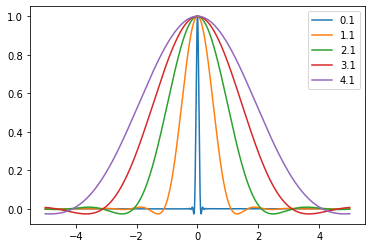

In [33]:
t_ = np.arange(-5,5,fs)
span = np.arange(0.1,5,1)

for i in span:
    h = cosR(1,i,t_)
    plt.plot(t_,h)   
plt.legend(span,prop = {'size': 10}, loc='upper right')

**La variable roll-off es el parámetro del RRC que tanta amplitud tienen los lobulos inferiores, viendose esto en frecuencia en que tanto se parece a un cuadrado, entre $\beta$ más cercano a uno más parecido a un rectangulo en frecuencia*

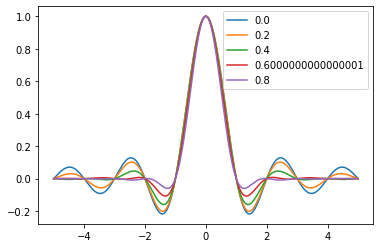

In [34]:
betha = np.arange(0,1,0.2)

for i in betha:
    h = cosR(i,1,t_)
    plt.plot(t_,h)   
plt.legend(betha,prop = {'size': 10}, loc='upper right')

* **Modulación por amplitud de pulso multi-nivel** Es una modulación donde el número de simbolos aumenta y se diferencias unos de otros el la amplitud de los mismo, como el número de simbolos aumenta tambien aumenta el número de bits que podemos representar por cada simbolo 
* **Eficiencia espectral** Diminuir al maxímo el consumo de frecuencias utilizadas por las pulse shaping 

### Simulaciones 

* **El impacto en el espectro potencia de la variación del “Span” del filtro RRC**
El la siguiente simulación podemos ver como se afecta el ancho del espectro segun se varia el Span

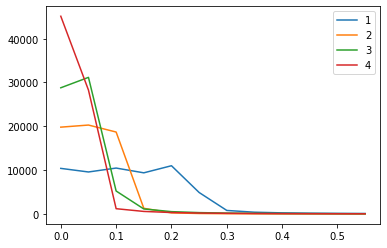

In [35]:
span = np.arange(1,5)
for i in span:
    h = cosR(0.0001,i,t_)
    H = np.fft.fft(h)
    
    f = np.fft.fftfreq((2*len(H))-1,fs)
    plot_hz(abs(H),0,1.2,f)
    plt.grid()
plt.legend(span,prop = {'size': 10}, loc='upper right')

* **El impacto en el espectro de potencia de una señal PAM con media diferente de cero**
Como la transoformada de Fourier es un operador lineal entonces 
$$g(t) = f(t) + m$$
$$G(w) = F(w) + m\delta(w)$$
para verlo mas facilmente vamos hacer $$f(t) = sin(2\pi tf)$$

In [36]:
fs = 100000
t = np.arange(0,0.01,1/fs)
f = np.sin(2*np.pi*t*2000)
m = 1
g = f+ m

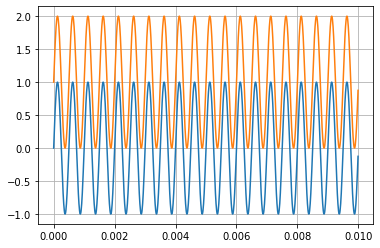

In [37]:
plt.plot(t,f,t,g)
plt.grid()

In [38]:
F = np.fft.fft(f)
G =  np.fft.fft(g)   
f_ = np.fft.fftfreq(len(F),1/fs)

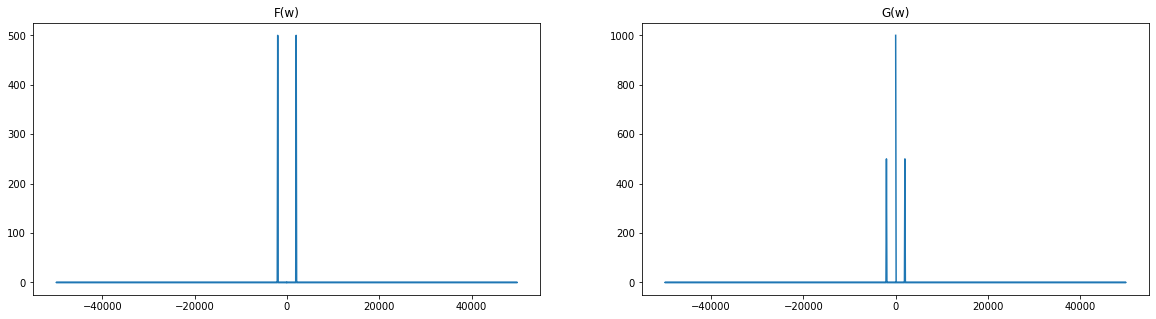

In [39]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('F(w)')
plt.plot(f_,abs(F))
plt.subplot(1,2,2)
plt.title('G(w)')
plt.plot(f_,abs(G))
